## <font color = 'green'>Model Evaluation

### Exercise 1

**Create a new file named ```model_evaluation.py``` or ```model_evaluation.ipynb``` for these exercises.**

### Exercise 2 
**Given the following confusion matrix, evaluation (by hand) the model's performance.** 

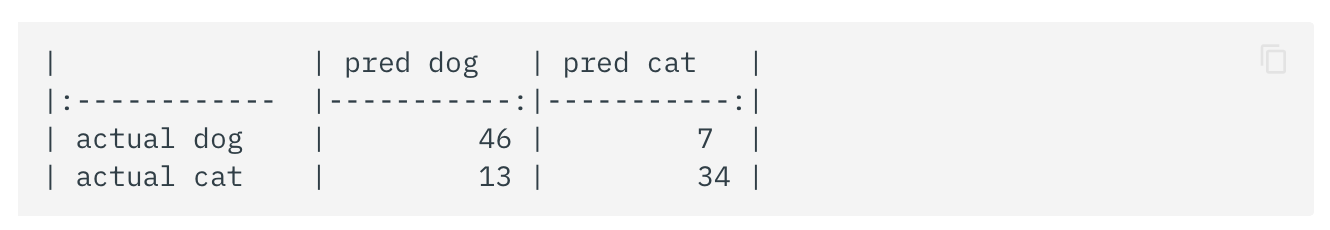

* In the context of this problem, what is a false positive?

    <font color = 'green'> **Predicted a dog, but it was actually not a dog (a cat)**<font color = 'black'> 

    
* In the context of this problem, what is a false negative?]

    <font color = 'green'> **Predicted it was not a dog (a cat), but it was actually a dog**<font color = 'black'> 

        
* How would you describe this model?   
       
    <font color = 'green'>**Accuracy = 80%        Precision = 87% (46/53)        Recall = 78% (46/59)**
   




**3.  You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.**

**Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.**



In [46]:
import pandas as pd
from sklearn.metrics import confusion_matrix

ducks = pd.read_csv('C3.csv')
ducks.head(2)

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect


In [47]:
ducks.shape

(200, 4)

### Exercise 3 

**Use the ```predictions``` dataset and pandas to help answer the following questions:**

* **An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?**

 <font color = 'green'>**Best metric is recall -- because we don't want any false negatives (defective ducks identified as non-defective ducks).**
    
**USE MODEL 3 -- 81.25% Recall**

In [81]:
# True Positive =  Predict  Defect & Actual Defect -->  X   X
# False Negative = Predict No Defect & Actual Defect  --> O  X    
# False Positive =  Predict Defect & No Actual Defect --->  X  O
# True Negative = Predict No Defect & No Actual Defect --> O O

In [82]:
ducks.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

In [83]:
# Assign baseline
ducks['baseline'] = 'Defect'
ducks

,actual,model1,model2,model3,baseline,baseline_prediction
0,No Defect,No Defect,Defect,No Defect,Defect,Defect
1,No Defect,No Defect,Defect,Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect,Defect,Defect
3,No Defect,Defect,Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect,Defect,Defect
...,...,...,...,...,...,...
195,No Defect,No Defect,Defect,Defect,Defect,Defect
196,Defect,Defect,No Defect,No Defect,Defect,Defect
197,No Defect,No Defect,No Defect,No Defect,Defect,Defect
198,No Defect,No Defect,Defect,Defect,Defect,Defect


In [84]:
(ducks.actual == ducks.baseline_prediction).mean()

0.08

In [85]:
model_1_accuracy = (ducks.actual == ducks.model1).mean()
baseline_accuracy = (ducks.actual == ducks.baseline).mean()

print(f'   model 1 accuracy: {model_1_accuracy:.2%}')
print(f'baseline accuracy: {baseline_accuracy:.2%}')

   model 1 accuracy: 95.00%
baseline accuracy: 8.00%


<font color = 'green'>**Best fitting model is model 3 -- 81.25% Recall.**

In [86]:
#Recall - only looks at the subset of actual positives ('Defect')


# Model 1
subset = ducks[ducks.actual == 'Defect']
#subset

In [87]:
model_1_recall = (subset.actual == subset.model1).mean()
baseline_recall = (subset.actual == subset.baseline_prediction).mean()


print("Model 1")
print(f"Model recall: {model_1_recall:.2%}")
print(f"Baseline recall: {baseline_recall:.2%}")

Model 1
Model recall: 50.00%
Baseline recall: 100.00%


In [88]:
subset = ducks[ducks.actual == 'Defect']
model_2_recall = (subset.actual == subset.model2).mean()
baseline_recall = (subset.actual == subset.baseline_prediction).mean()


print("Model 2")
print(f"Model recall: {model_2_recall:.2%}")
print(f"Baseline recall: {baseline_recall:.2%}")

Model 2
Model recall: 56.25%
Baseline recall: 100.00%


In [89]:
subset = ducks[ducks.actual == 'Defect']
model_3_recall = (subset.actual == subset.model3).mean()
baseline_recall = (subset.actual == subset.baseline_prediction).mean()


print("Model 3")
print(f"Model recall: {model_3_recall:.2%}")
print(f"Baseline recall: {baseline_recall:.2%}")

Model 3
Model recall: 81.25%
Baseline recall: 100.00%


* **Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you they really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?   

<font color = 'green'>**Best metric is precision -- because we don't want any false positives (non-defective ducks identified as defective ducks).**
    
**BEST MODEL is Model 1 -- 80% Precision**

In [92]:
# Precision: # only look at the subset where we made positive prediction (i.e. prediction == 'defect')


In [93]:

subset = ducks[ducks.model1 == 'Defect']
model1_precision = (subset.actual == subset.model1).mean()
print(f'Model 1 precision: {model1_precision:.2%}')


subset = ducks[ducks.model2 == 'Defect']
model2_precision = (subset.actual == subset.model2).mean()
print(f'Model 2 precision: {model2_precision:.2%}')


subset = ducks[ducks.model3 == 'Defect']
model3_precision = (subset.actual == subset.model3).mean()
print(f'Model 3 precision: {model3_precision:.2%}')



Model 1 precision: 80.00%
Model 2 precision: 10.00%
Model 3 precision: 13.13%


### Exercise 4

**You are working as a data scientist for *Gives You Paws™*, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).**

**At *Gives You Paws*, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).**

**Several models have already been developed with the data, and you can find their results here.**

**Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:**

* **a. In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?**

In [94]:
gyp = pd.read_csv('gives_you_paws.csv')
gyp.head(2)

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog


In [95]:
gyp.shape

(5000, 5)

In [96]:
gyp.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

In [99]:
# A baseline predicts the most common class every single time

gyp['baseline'] = 'dog'
gyp.head(2)

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog


In [100]:
# Finding Accuracy

baseline_accuracy = (gyp.actual == gyp.baseline).mean()
model_1_accuracy = (gyp.actual == gyp.model1).mean()
model_2_accuracy = (gyp.actual == gyp.model2).mean()
model_3_accuracy = (gyp.actual == gyp.model3).mean()
model_4_accuracy = (gyp.actual == gyp.model4).mean()
print(f'Baseline accuracy: {baseline_accuracy:.2%}')
print(f'Model 1 accuracy: {model_1_accuracy:.2%}')
print(f'Model 2 accuracy: {model_2_accuracy:.2%}')
print(f'Model 3 accuracy: {model_3_accuracy:.2%}')
print(f'Model 4 accuracy: {model_4_accuracy:.2%}')

Baseline accuracy: 65.08%
Model 1 accuracy: 80.74%
Model 2 accuracy: 63.04%
Model 3 accuracy: 50.96%
Model 4 accuracy: 74.26%


### Model 1 is the most accurate.  Models 1 and 4 are better than baseline accuracy.

* **b. Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recommend for Phase I? For Phase II?**


In [101]:
# import sklearn functions
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [103]:
gyp

y_true = gyp.actual
y_pred = gyp.model1

In [105]:
print('Model 1:')
print(classification_report(y_true, y_pred, labels = ['dog', 'cat']))

Model 1:
              precision    recall  f1-score   support

         dog       0.89      0.80      0.84      3254
         cat       0.69      0.82      0.75      1746

    accuracy                           0.81      5000
   macro avg       0.79      0.81      0.80      5000
weighted avg       0.82      0.81      0.81      5000



In [106]:
y_true = gyp.actual
y_pred = gyp.model2
print('Model 2:')
print(classification_report(y_true, y_pred, labels = ['dog', 'cat']))

Model 2:
              precision    recall  f1-score   support

         dog       0.89      0.49      0.63      3254
         cat       0.48      0.89      0.63      1746

    accuracy                           0.63      5000
   macro avg       0.69      0.69      0.63      5000
weighted avg       0.75      0.63      0.63      5000



In [107]:
y_true = gyp.actual
y_pred = gyp.model3
print('Model 3:')
print(classification_report(y_true, y_pred, labels = ['dog', 'cat']))

Model 3:
              precision    recall  f1-score   support

         dog       0.66      0.51      0.57      3254
         cat       0.36      0.51      0.42      1746

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.50      5000
weighted avg       0.55      0.51      0.52      5000



In [108]:
y_true = gyp.actual
y_pred = gyp.model4

print('Model 4:')
print(classification_report(y_true, y_pred, labels = ['dog', 'cat']))

Model 4:
              precision    recall  f1-score   support

         dog       0.73      0.96      0.83      3254
         cat       0.81      0.35      0.48      1746

    accuracy                           0.74      5000
   macro avg       0.77      0.65      0.66      5000
weighted avg       0.76      0.74      0.71      5000



* **c. Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?**

## Exercise 5: 

**Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.**

* sklearn.metrics.accuracy_score
* sklearn.metrics.precision_score
* sklearn.metrics.recall_score
* sklearn.metrics.classification_report

In [114]:
import warnings 
warnings.filterwarnings("ignore")

# import sklearn functions
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [117]:
# Classification reports are shown above
y_true = gyp.actual
y_pred = gyp.model1
acc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, labels = ['dog','cat'], average = None) 
rec = recall_score(y_true, y_pred, labels = ['dog','cat'], average = None)
print('Accuracy Score for Model 1 is', acc)
print('Precision Score for Model 1 is', pre)
print('Recall Score for Model 1 is', rec)


Accuracy Score for Model 1 is 0.8074
Precision Score for Model 1 is [0.89002383 0.68977218]
Recall Score for Model 1 is [0.80331899 0.81500573]


In [118]:
y_true = gyp.actual
y_pred = gyp.model2
acc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, labels = ['dog','cat'], average = None) 
rec = recall_score(y_true, y_pred, labels = ['dog','cat'], average = None)
print('Accuracy Score for Model 2 is', acc)
print('Precision Score for Model 2 is', pre)
print('Recall Score for Model 2 is', rec)

Accuracy Score for Model 2 is 0.6304
Precision Score for Model 2 is [0.89317673 0.48412204]
Recall Score for Model 2 is [0.49078058 0.8906071 ]


In [119]:
y_true = gyp.actual
y_pred = gyp.model3
acc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, labels = ['dog','cat'], average = None) 
rec = recall_score(y_true, y_pred, labels = ['dog','cat'], average = None)
print('Accuracy Score for Model 3 is', acc)
print('Precision Score for Model 3 is', pre)
print('Recall Score for Model 3 is', rec)

Accuracy Score for Model 3 is 0.5096
Precision Score for Model 3 is [0.65988836 0.35834671]
Recall Score for Model 3 is [0.50860479 0.51145475]


In [120]:
y_true = gyp.actual
y_pred = gyp.model4
acc = accuracy_score(y_true, y_pred)
pre = precision_score(y_true, y_pred, labels = ['dog','cat'], average = None) 
rec = recall_score(y_true, y_pred, labels = ['dog','cat'], average = None)
print('Accuracy Score for Model 4 is', acc)
print('Precision Score for Model 4 is', pre)
print('Recall Score for Model 4 is', rec)

Accuracy Score for Model 4 is 0.7426
Precision Score for Model 4 is [0.73124853 0.80722892]
Recall Score for Model 4 is [0.95574677 0.34536082]
